### BMOM_aqua

/glade/scratch/xiaoning/BMOM_aqua_production_branch_3h/run


In [1]:
%matplotlib inline

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mom6_tools.MOM6grid import MOM6grid
from mom6_tools.m6plot import xyplot
import matplotlib

Basemap module not found. Some regional plots may not function properly


In [2]:
path= '/glade/scratch/xiaoning/BMOM_aqua_production_branch_3h/run/'
grd = MOM6grid(path+'BMOM_aqua_production_branch_3h.mom6.static.nc')
area = np.ma.masked_where(grd.wet==0,grd.area_t)

MOM6 grid successfully loaded... 



### Heat balance

#### After 20 years

In [3]:
hi = 6.62434622223704e+25
hf = 6.62483368615106e+25

In [4]:
# after 20 years, from cpl table (period = all_time: date =   4210101): 0.55318990
heat = (hf-hi) / (area.sum() * 3600. * 24 * 365. *20)
print('Change in heat is {} W/m2'.format(heat))
print('Change in heat + cpl is {} W/m2'.format(heat+0.55318990))

Change in heat is 0.01545789923263169 W/m2
Change in heat + cpl is 0.5686477992326318 W/m2


### Heat associated with mass entering/leaving the ocean

In [5]:
frc = xr.open_mfdataset(path+'BMOM_aqua_production_branch_3h.mom6.frc_04??.nc')

/glade/u/home/gmarques/miniconda3/envs/analysis/lib/python3.7/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/glade/u/home/gmarques/miniconda3/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/glade/u/home/gmarques/miniconda3/envs/analysis/lib/python3.7/site-packages/xarray/backends/api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` funct

In [36]:
heat_content_massin = np.ma.masked_invalid(frc.heat_content_massin.mean('time').values)
heat_content_massout = np.ma.masked_invalid(frc.heat_content_massout.mean('time').values)
heat_PmE = np.ma.masked_invalid(frc.Heat_PmE.mean('time').values)
net_heat_coupler = np.ma.masked_invalid(frc.net_heat_coupler.mean('time').values)
net_heat_surface = np.ma.masked_invalid(frc.net_heat_surface.mean('time').values)
LwLatSens = np.ma.masked_invalid(frc.LwLatSens.mean('time').values)
sensible = np.ma.masked_invalid(frc.sensible.mean('time').values)
latent = np.ma.masked_invalid(frc.latent.mean('time').values)
SW = np.ma.masked_invalid(frc.SW.mean('time').values)
LW = np.ma.masked_invalid(frc.LW.mean('time').values)

/glade/u/home/gmarques/miniconda3/envs/analysis/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/u/home/gmarques/miniconda3/envs/analysis/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/u/home/gmarques/miniconda3/envs/analysis/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/u/home/gmarques/miniconda3/envs/analysis/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/u/home/gmarques/miniconda3/envs/analysis/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/u/home/gmarques/miniconda3/e

In [7]:
#print(heat_content_massin.mean(dim=('yh','xh')).values)
#print(heat_content_massout.mean(dim=('yh','xh')).values)

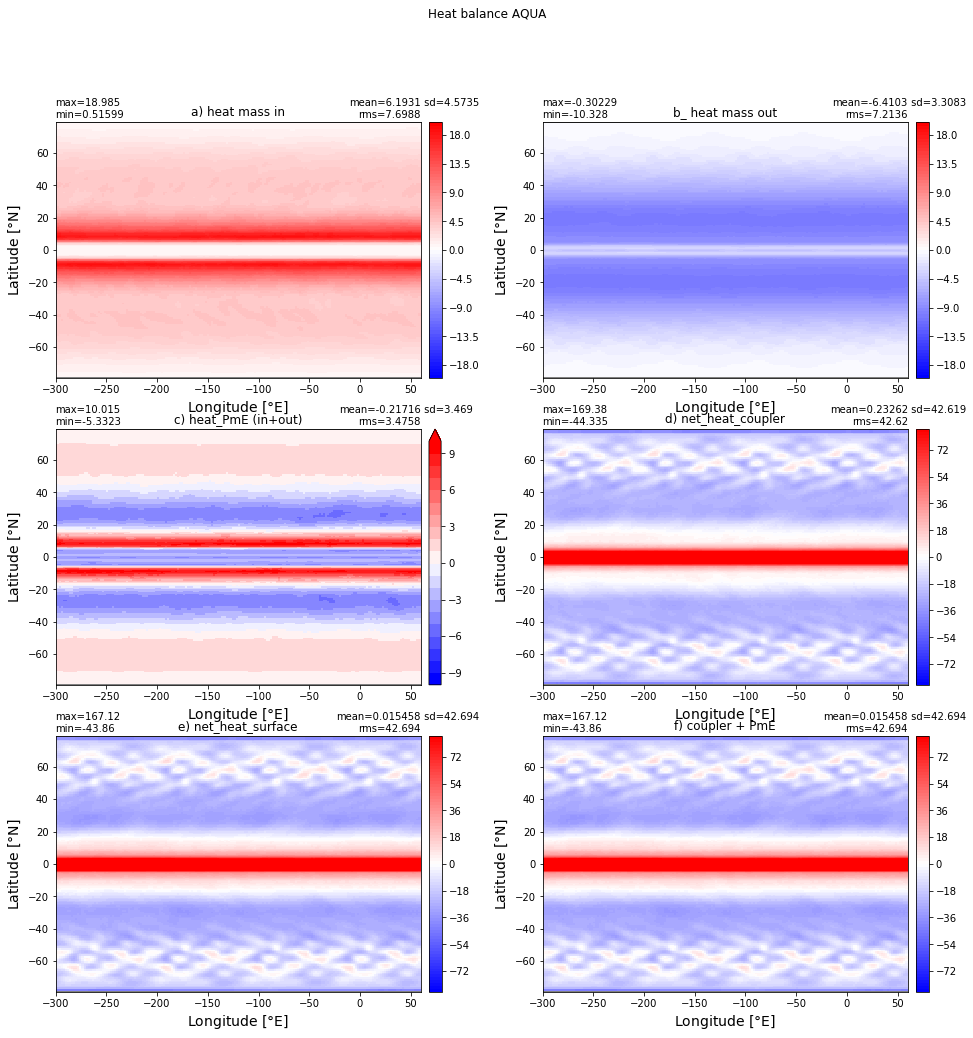

In [35]:
%matplotlib inline

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16,16))

ax1 = ax.flatten()
plt.suptitle('Heat balance AQUA')
xyplot(heat_content_massin, grd.geolon, grd.geolat, grd.area_t,  title='a) heat mass in', 
       axis=ax1[0], nbins=100, colormap=plt.cm.bwr, clim=(-20,20))
xyplot(heat_content_massout, grd.geolon, grd.geolat, grd.area_t,  title='b_ heat mass out', 
       axis=ax1[1], nbins=100, colormap=plt.cm.bwr, clim=(-20,20))
xyplot((heat_PmE), grd.geolon, grd.geolat, grd.area_t, title='c) heat_PmE (in+out)', 
       colormap=plt.cm.bwr, clim=(-10,10), axis=ax1[2])
xyplot(net_heat_coupler, grd.geolon, grd.geolat, grd.area_t, title='d) net_heat_coupler', 
        nbins=100, colormap=plt.cm.bwr, axis=ax1[3])
xyplot(net_heat_surface, grd.geolon, grd.geolat, grd.area_t, title='e) net_heat_surface', 
        nbins=100, colormap=plt.cm.bwr, axis=ax1[4])
xyplot(net_heat_coupler+heat_PmE, grd.geolon, grd.geolat, grd.area_t, title='f) coupler + PmE', 
        nbins=100, colormap=plt.cm.bwr, axis=ax1[5])

plt.savefig('BMOM_Aqua.png', dpi=200,bbox_inches='tight',pad_inches=0)

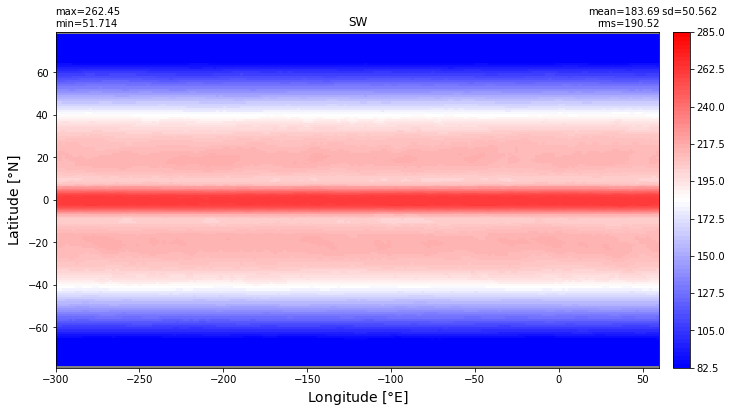

In [38]:
xyplot(SW, grd.geolon, grd.geolat, grd.area_t, title='SW', 
        nbins=100, colormap=plt.cm.bwr)

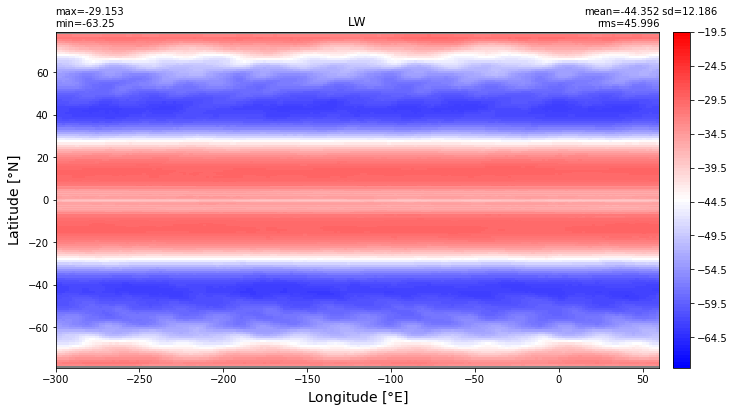

In [39]:
xyplot(LW, grd.geolon, grd.geolat, grd.area_t, title='LW', 
        nbins=100, colormap=plt.cm.bwr)

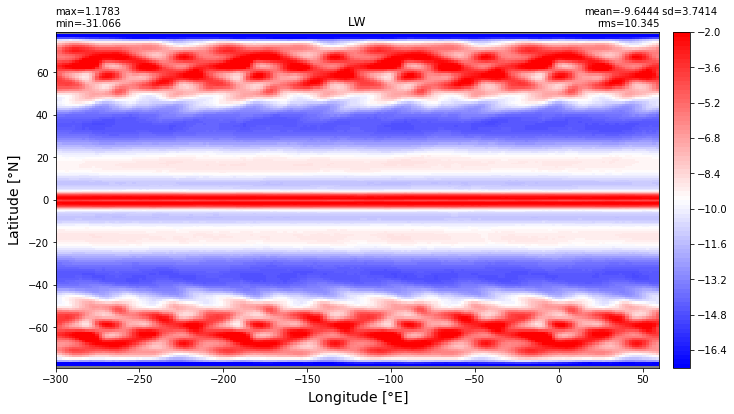

In [40]:
xyplot(sensible, grd.geolon, grd.geolat, grd.area_t, title='LW', 
        nbins=100, colormap=plt.cm.bwr)

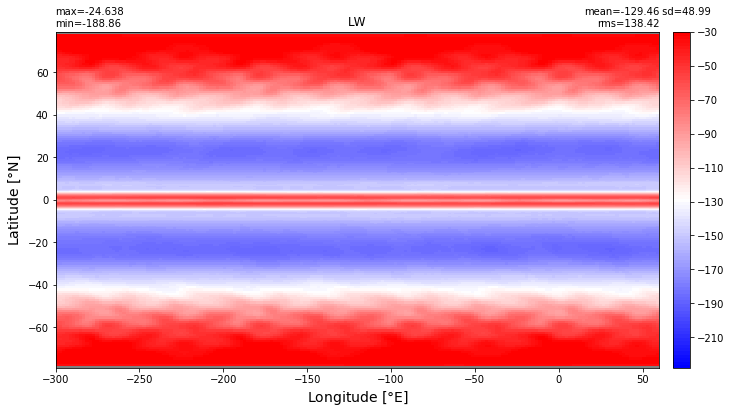

In [41]:
xyplot(latent, grd.geolon, grd.geolat, grd.area_t, title='LW', 
        nbins=100, colormap=plt.cm.bwr)

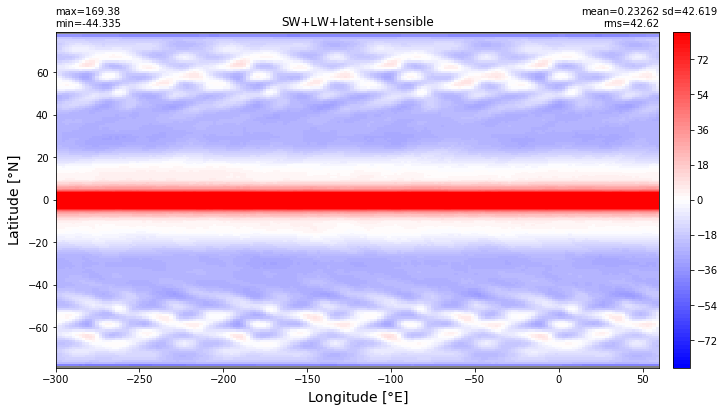

In [42]:
xyplot(SW+LW+latent+sensible, grd.geolon, grd.geolat, grd.area_t, title='SW+LW+latent+sensible', 
        nbins=100, colormap=plt.cm.bwr)

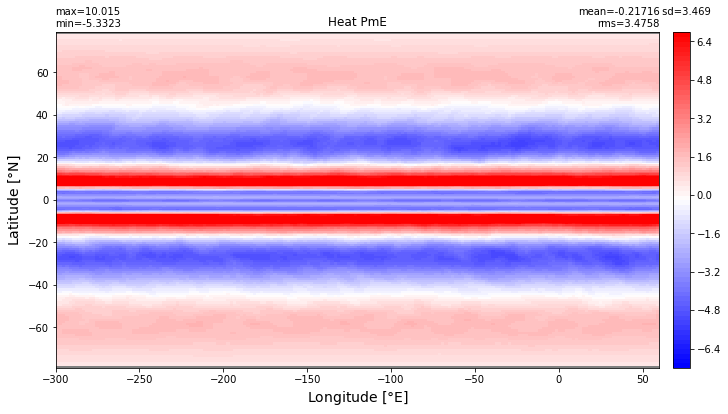

In [44]:
xyplot(heat_PmE, grd.geolon, grd.geolat, grd.area_t, title='Heat PmE', 
        nbins=100, colormap=plt.cm.bwr)

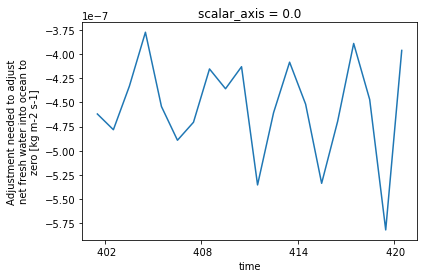

In [48]:
frc.net_fresh_water_global_adjustment.plot()

In [45]:
added_water = np.ma.masked_invalid(frc.net_fresh_water_global_adjustment.mean('time').values)

In [46]:
xyplot(added_water, grd.geolon, grd.geolat, grd.area_t, title='added_water', 
        nbins=100, colormap=plt.cm.bwr)

ValueError: not enough values to unpack (expected 2, got 1)